# Hubmap to zarr

> Convert tiff files to zarr files with scale factor

In [28]:
# Install zarr and load packages
# !pip install -qq zarr
import cv2, zarr, tifffile
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from pathlib import Path

In [29]:
def read_image(image_id, path, scale=None, verbose=1):
    "Load images with ID from path"
    
    image = tifffile.imread(path/f"train2/{image_id}.tiff")
    # 部分图像输入顺序有问题，需要调整
    if len(image.shape) == 5:
        image = image.squeeze().transpose(1, 2, 0)
    elif image.shape[0] == 3:
        image = image.transpose(1, 2, 0)
    
    if verbose:
        print(f"[{image_id}] Image shape: {image.shape}")
    
    if scale:
        new_size = (image.shape[1] // scale, image.shape[0] // scale)
        image = cv2.resize(image, new_size)
        
        if verbose:
            print(f"[{image_id}] Resized Image shape: {image.shape}")
        
    return image

# Settings

In [30]:
scale = 2

path = Path('../input/hubmap-kidney-segmentation')

df_train = pd.read_csv(path/"train.csv")

df_test = pd.read_csv('../input/hubmap-kidney-segmentation/submission_TF_1_034_10.csv')
df_test.columns = df_train.columns
df_train = pd.concat([df_train, df_test]).reset_index(drop=True)

g_out = zarr.group(f'../working/train_scale{scale}_TF_1_034_10')

In [31]:
df_train.head(20)

,id,encoding
0,2f6ecfcdf,296084587 4 296115835 6 296115859 14 296147109...
1,8242609fa,96909968 56 96941265 60 96972563 64 97003861 6...
2,aaa6a05cc,30989109 59 31007591 64 31026074 68 31044556 7...
3,cb2d976f4,78144363 5 78179297 15 78214231 25 78249165 35...
4,b9a3865fc,61271840 4 61303134 13 61334428 22 61365722 30...
5,b2dc8411c,56157731 21 56172571 45 56187411 51 56202252 5...
6,0486052bb,101676003 6 101701785 8 101727568 9 101753351 ...
7,e79de561c,7334642 14 7350821 41 7367001 67 7383180 82 73...
8,095bf7a1f,113277795 21 113315936 53 113354083 87 1133922...
9,54f2eec69,124967057 36 124997425 109 125027828 147 12505...


## Loop over images

[2f6ecfcdf] Image shape: (31278, 25794, 3)
[2f6ecfcdf] Resized Image shape: (15639, 12897, 3)
Name               : /2f6ecfcdf
Type               : zarr.core.Array
Data type          : uint8
Shape              : (15639, 12897, 3)
Chunk shape        : (978, 1613, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 605088549 (577.1M)
No. bytes stored   : 394771019 (376.5M)
Storage ratio      : 1.5
Chunks initialized : 384/384



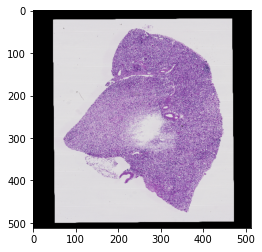

[8242609fa] Image shape: (31299, 44066, 3)
[8242609fa] Resized Image shape: (15649, 22033, 3)
Name               : /8242609fa
Type               : zarr.core.Array
Data type          : uint8
Shape              : (15649, 22033, 3)
Chunk shape        : (979, 2755, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 1034383251 (986.5M)
No. bytes stored   : 820447573 (782.4M)
Storage ratio      : 1.3
Chunks initialized : 384/384



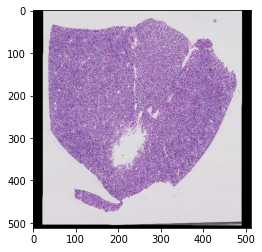

[aaa6a05cc] Image shape: (18484, 13013, 3)
[aaa6a05cc] Resized Image shape: (9242, 6506, 3)
Name               : /aaa6a05cc
Type               : zarr.core.Array
Data type          : uint8
Shape              : (9242, 6506, 3)
Chunk shape        : (1156, 814, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 180385356 (172.0M)
No. bytes stored   : 139902004 (133.4M)
Storage ratio      : 1.3
Chunks initialized : 192/192



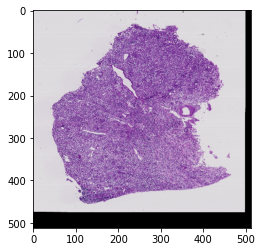

[cb2d976f4] Image shape: (34940, 49548, 3)
[cb2d976f4] Resized Image shape: (17470, 24774, 3)
Name               : /cb2d976f4
Type               : zarr.core.Array
Data type          : uint8
Shape              : (17470, 24774, 3)
Chunk shape        : (1092, 1549, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 1298405340 (1.2G)
No. bytes stored   : 900024637 (858.3M)
Storage ratio      : 1.4
Chunks initialized : 768/768



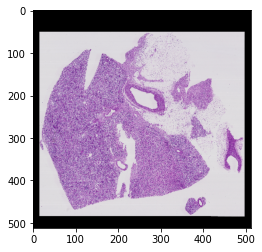

[b9a3865fc] Image shape: (31295, 40429, 3)
[b9a3865fc] Resized Image shape: (15647, 20214, 3)
Name               : /b9a3865fc
Type               : zarr.core.Array
Data type          : uint8
Shape              : (15647, 20214, 3)
Chunk shape        : (978, 2527, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 948865374 (904.9M)
No. bytes stored   : 797363434 (760.4M)
Storage ratio      : 1.2
Chunks initialized : 384/384



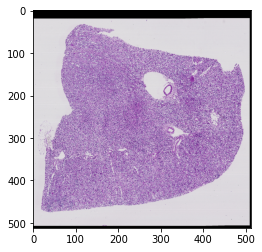

[b2dc8411c] Image shape: (14844, 31262, 3)
[b2dc8411c] Resized Image shape: (7422, 15631, 3)
Name               : /b2dc8411c
Type               : zarr.core.Array
Data type          : uint8
Shape              : (7422, 15631, 3)
Chunk shape        : (928, 1954, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 348039846 (331.9M)
No. bytes stored   : 226711859 (216.2M)
Storage ratio      : 1.5
Chunks initialized : 192/192



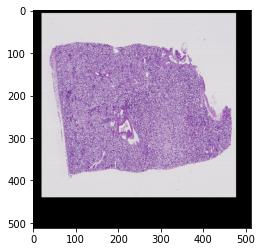

[0486052bb] Image shape: (25784, 34937, 3)
[0486052bb] Resized Image shape: (12892, 17468, 3)
Name               : /0486052bb
Type               : zarr.core.Array
Data type          : uint8
Shape              : (12892, 17468, 3)
Chunk shape        : (806, 2184, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 675592368 (644.3M)
No. bytes stored   : 452794555 (431.8M)
Storage ratio      : 1.5
Chunks initialized : 384/384



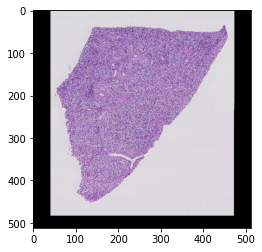

[e79de561c] Image shape: (16180, 27020, 3)
[e79de561c] Resized Image shape: (8090, 13510, 3)
Name               : /e79de561c
Type               : zarr.core.Array
Data type          : uint8
Shape              : (8090, 13510, 3)
Chunk shape        : (1012, 1689, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 327887700 (312.7M)
No. bytes stored   : 280713380 (267.7M)
Storage ratio      : 1.2
Chunks initialized : 192/192



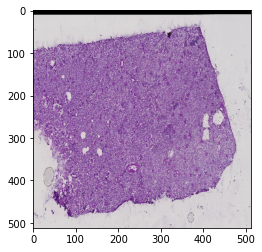

[095bf7a1f] Image shape: (38160, 39000, 3)
[095bf7a1f] Resized Image shape: (19080, 19500, 3)
Name               : /095bf7a1f
Type               : zarr.core.Array
Data type          : uint8
Shape              : (19080, 19500, 3)
Chunk shape        : (1193, 2438, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 1116180000 (1.0G)
No. bytes stored   : 761379861 (726.1M)
Storage ratio      : 1.5
Chunks initialized : 384/384



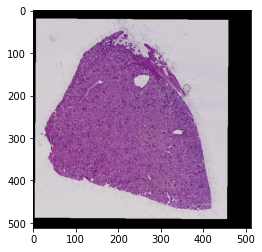

[54f2eec69] Image shape: (30440, 22240, 3)
[54f2eec69] Resized Image shape: (15220, 11120, 3)
Name               : /54f2eec69
Type               : zarr.core.Array
Data type          : uint8
Shape              : (15220, 11120, 3)
Chunk shape        : (952, 1390, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 507739200 (484.2M)
No. bytes stored   : 350545021 (334.3M)
Storage ratio      : 1.4
Chunks initialized : 384/384



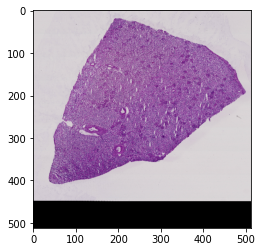

[4ef6695ce] Image shape: (39960, 50680, 3)
[4ef6695ce] Resized Image shape: (19980, 25340, 3)
Name               : /4ef6695ce
Type               : zarr.core.Array
Data type          : uint8
Shape              : (19980, 25340, 3)
Chunk shape        : (1249, 1584, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 1518879600 (1.4G)
No. bytes stored   : 1198290008 (1.1G)
Storage ratio      : 1.3
Chunks initialized : 768/768



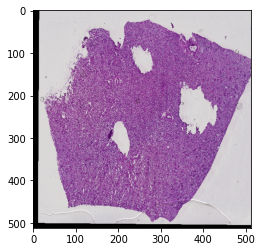

[26dc41664] Image shape: (38160, 42360, 3)
[26dc41664] Resized Image shape: (19080, 21180, 3)
Name               : /26dc41664
Type               : zarr.core.Array
Data type          : uint8
Shape              : (19080, 21180, 3)
Chunk shape        : (1193, 2648, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 1212343200 (1.1G)
No. bytes stored   : 827651005 (789.3M)
Storage ratio      : 1.5
Chunks initialized : 384/384



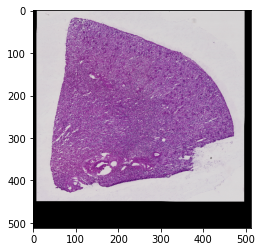

[c68fe75ea] Image shape: (26840, 49780, 3)
[c68fe75ea] Resized Image shape: (13420, 24890, 3)
Name               : /c68fe75ea
Type               : zarr.core.Array
Data type          : uint8
Shape              : (13420, 24890, 3)
Chunk shape        : (839, 3112, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 1002071400 (955.6M)
No. bytes stored   : 920650256 (878.0M)
Storage ratio      : 1.1
Chunks initialized : 384/384



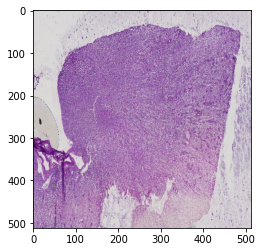

[afa5e8098] Image shape: (36800, 43780, 3)
[afa5e8098] Resized Image shape: (18400, 21890, 3)
Name               : /afa5e8098
Type               : zarr.core.Array
Data type          : uint8
Shape              : (18400, 21890, 3)
Chunk shape        : (1150, 2737, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 1208328000 (1.1G)
No. bytes stored   : 973224241 (928.1M)
Storage ratio      : 1.2
Chunks initialized : 384/384



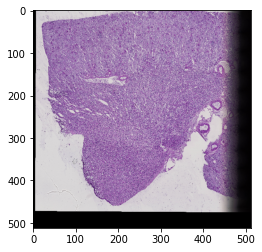

[1e2425f28] Image shape: (26780, 32220, 3)
[1e2425f28] Resized Image shape: (13390, 16110, 3)
Name               : /1e2425f28
Type               : zarr.core.Array
Data type          : uint8
Shape              : (13390, 16110, 3)
Chunk shape        : (837, 2014, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 647138700 (617.2M)
No. bytes stored   : 520714410 (496.6M)
Storage ratio      : 1.2
Chunks initialized : 384/384



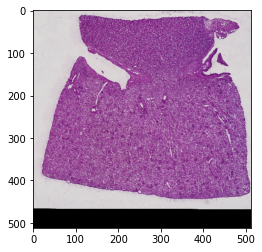

[aa05346ff] Image shape: (30720, 47340, 3)
[aa05346ff] Resized Image shape: (15360, 23670, 3)
Name               : /aa05346ff
Type               : zarr.core.Array
Data type          : uint8
Shape              : (15360, 23670, 3)
Chunk shape        : (960, 2959, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 1090713600 (1.0G)
No. bytes stored   : 906637880 (864.6M)
Storage ratio      : 1.2
Chunks initialized : 384/384



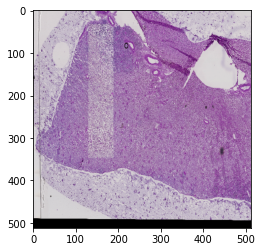

[2ec3f1bb9] Image shape: (23990, 47723, 3)
[2ec3f1bb9] Resized Image shape: (11995, 23861, 3)
Name               : /2ec3f1bb9
Type               : zarr.core.Array
Data type          : uint8
Shape              : (11995, 23861, 3)
Chunk shape        : (750, 2983, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 858638085 (818.9M)
No. bytes stored   : 730195227 (696.4M)
Storage ratio      : 1.2
Chunks initialized : 384/384



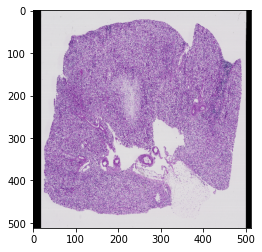

[3589adb90] Image shape: (29433, 22165, 3)
[3589adb90] Resized Image shape: (14716, 11082, 3)
Name               : /3589adb90
Type               : zarr.core.Array
Data type          : uint8
Shape              : (14716, 11082, 3)
Chunk shape        : (920, 1386, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 489248136 (466.6M)
No. bytes stored   : 365108251 (348.2M)
Storage ratio      : 1.3
Chunks initialized : 384/384



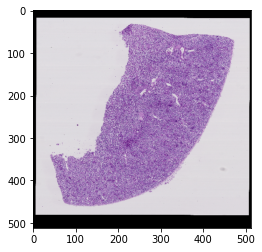

[d488c759a] Image shape: (46660, 29020, 3)
[d488c759a] Resized Image shape: (23330, 14510, 3)
Name               : /d488c759a
Type               : zarr.core.Array
Data type          : uint8
Shape              : (23330, 14510, 3)
Chunk shape        : (1459, 1814, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 1015554900 (968.5M)
No. bytes stored   : 726390953 (692.7M)
Storage ratio      : 1.4
Chunks initialized : 384/384



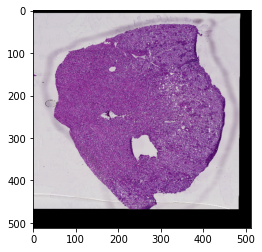

[57512b7f1] Image shape: (33240, 43160, 3)
[57512b7f1] Resized Image shape: (16620, 21580, 3)
Name               : /57512b7f1
Type               : zarr.core.Array
Data type          : uint8
Shape              : (16620, 21580, 3)
Chunk shape        : (1039, 2698, 1)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 1075978800 (1.0G)
No. bytes stored   : 700971783 (668.5M)
Storage ratio      : 1.5
Chunks initialized : 384/384



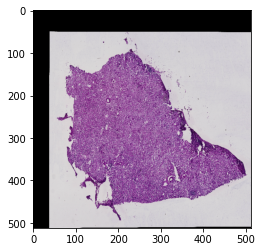

In [32]:
for idx in df_train['id']:
    img = read_image(idx, path, scale=scale)
    g_out[idx] = img
    print(g_out[idx].info)
    
    plt.imshow(cv2.resize(img, dsize=(512, 512)))
    plt.show()